# ✈️ Flight Delay Performance Analysis

This project analyzes airline on-time performance using a cleaned and enriched dataset.

## Objectives
- Understand delay patterns
- Identify the best & worst performing airlines
- Analyze route and distance impact on delays
- Discover time-based delay trends

## Import Libraries

We use:
- pandas → data manipulation
- matplotlib & seaborn → visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

## Load Dataset

The dataset used here is the final analytical table produced from the SQL ETL process.

In [ ]:
df = pd.read_csv("flight_enriched.csv")
df.head()

,FlightDate,Year,Month,DayOfWeek,Operating_Airline,Origin,OriginStateName,Dest,DestStateName,DepDelay,...,SecurityDelay,LateAircraftDelay,is_delayed,delay_severity,flight_route,distance_group,flight_month,flight_year,flight_day_of_week_num,is_weekend
0,2024-01-04,2024,1,4,B6,JFK,New York,ROC,New York,14.0,...,NaN,NaN,0,On Time,JFK-ROC,Short Haul,1,2024,4,0
1,2024-01-04,2024,1,4,B6,JFK,New York,SAV,Georgia,29.0,...,0.0,1.0,1,Minor Delay,JFK-SAV,Medium Haul,1,2024,4,0
2,2024-01-04,2024,1,4,B6,JFK,New York,SJU,Puerto Rico,3.0,...,NaN,NaN,0,On Time,JFK-SJU,Long Haul,1,2024,4,0
3,2024-01-04,2024,1,4,B6,LAS,Nevada,BOS,Massachusetts,-13.0,...,NaN,NaN,0,On Time,LAS-BOS,Long Haul,1,2024,4,0
4,2024-01-04,2024,1,4,B6,LAX,California,JFK,New York,-5.0,...,NaN,NaN,0,On Time,LAX-JFK,Long Haul,1,2024,4,0


## Data Understanding

Check:
- number of rows & columns
- data types
- missing values

In [ ]:
df.shape

(437652, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437652 entries, 0 to 437651
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FlightDate              437652 non-null  object 
 1   Year                    437652 non-null  int64  
 2   Month                   437652 non-null  int64  
 3   DayOfWeek               437652 non-null  int64  
 4   Operating_Airline       437652 non-null  object 
 5   Origin                  437652 non-null  object 
 6   OriginStateName         437652 non-null  object 
 7   Dest                    437652 non-null  object 
 8   DestStateName           437652 non-null  object 
 9   DepDelay                437652 non-null  float64
 10  ArrDelay                437652 non-null  float64
 11  DepDel15                437652 non-null  float64
 12  ArrDel15                437652 non-null  float64
 13  Cancelled               437652 non-null  float64
 14  Diverted            

In [ ]:
df.isna().sum()

,0
FlightDate,0
Year,0
Month,0
DayOfWeek,0
Operating_Airline,0
Origin,0
OriginStateName,0
Dest,0
DestStateName,0
DepDelay,0


## Delay Distribution Overview

We start by understanding the overall delay behavior:
- How many flights are delayed?
- How is the arrival delay distributed?

In [ ]:
df["FlightDate"] = pd.to_datetime(df["FlightDate"])

In [ ]:
df["is_delayed"].value_counts(normalize=True) * 100

,proportion
is_delayed,
0,76.569055
1,23.430945


### Insigth On-Time vs Delayed Flights

Approximately **76.6% of flights arrived on time**, while **23.4% experienced delays**.

This means that **nearly 1 in 4 flights is delayed**, indicating that flight punctuality remains a significant operational challenge.

From a business perspective, this level of delay can:
- reduce customer satisfaction
- increase operational costs due to rescheduling and missed connections
- impact airline reliability perception

Although the majority of flights are on time, the delay proportion is still large enough to justify deeper analysis into:
- which airlines contribute most to delays
- when delays occur most frequently
- what operational factors influence them

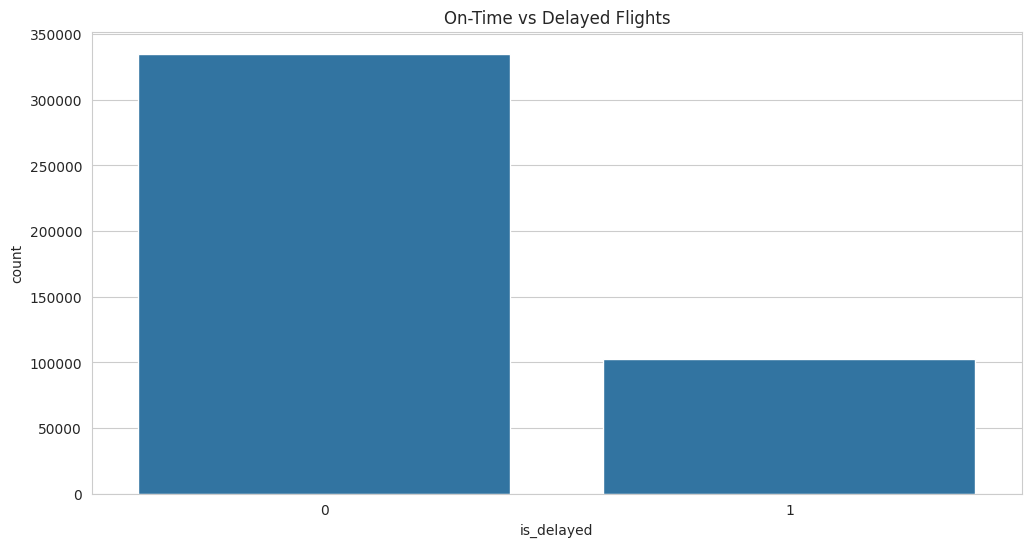

In [ ]:
sns.countplot(x="is_delayed", data=df)
plt.title("On-Time vs Delayed Flights")
plt.show()

### Business Insight: On-Time Performance

The majority of flights (around 76%) arrive on time, which indicates that the overall operation is relatively stable.  
However, the remaining **23% delay rate is operationally significant**, as it means nearly **1 in every 4 flights fails to meet the schedule**.

From a business perspective, this level of delay can have several impacts:

- **Customer experience:** Frequent delays reduce passenger satisfaction and weaken brand loyalty.
- **Operational cost:** Delays create additional costs due to crew rescheduling, airport congestion, and missed connections.
- **Network reliability:** A delay in one flight can propagate across the system and affect subsequent flights.

This baseline shows that improving on-time performance — even by a few percentage points — could deliver a substantial improvement in:
- customer perception
- operational efficiency
- competitive advantage among airlines.

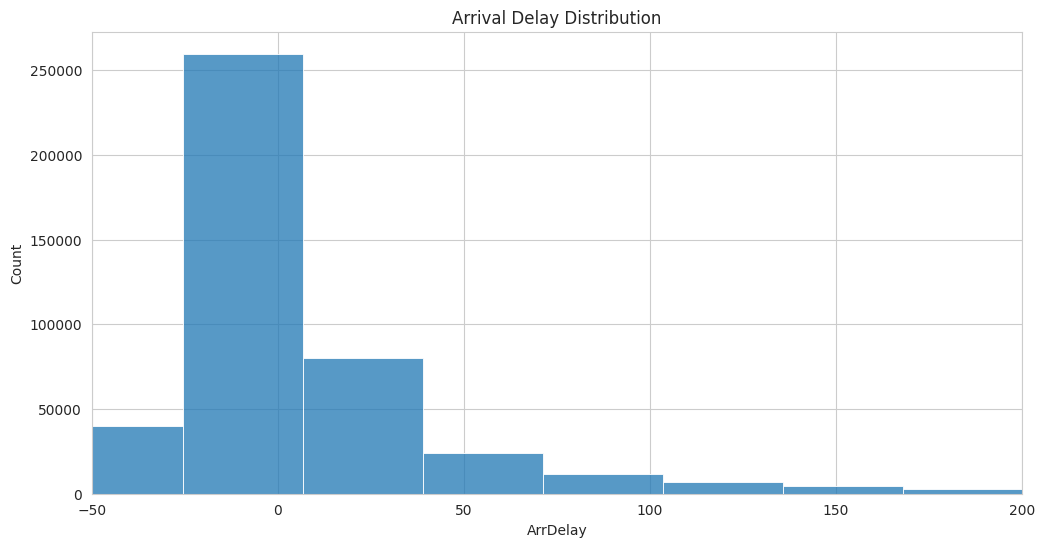

In [ ]:
sns.histplot(df["ArrDelay"], bins=100)
plt.xlim(-50, 200)
plt.title("Arrival Delay Distribution")
plt.show()

### Business Insight: Arrival Delay Distribution

Most flights arrive close to the scheduled time, as shown by the high concentration of values around zero.  
This indicates that the core operation is generally well-controlled.

However, the distribution is **right-skewed**, meaning that while delays are less frequent,
when they occur they can be **very large (long tail up to 200 minutes)**.

From a business perspective, this is critical:

- **Severe delays drive the highest operational cost**, not the small delays.
- A single long delay can disrupt aircraft rotation for the rest of the day.
- Extreme delays increase:
  - passenger compensation
  - crew overtime
  - airport resource congestion
  - missed connections

This means the main opportunity for improvement is **not reducing small delays**,  
but **preventing extreme delays**, as they create the biggest operational and financial impact.

## Airline On-Time Performance

This section evaluates which airlines have the best and worst delay performance.

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
airline_performance = (
    df.groupby("Operating_Airline")
    .agg(
        avg_arr_delay=("ArrDelay", "mean"),
        delay_rate=("is_delayed", "mean"),
        total_flights=("ArrDelay", "count")
    )
    .sort_values("avg_arr_delay")
)

airline_performance.head()

,avg_arr_delay,delay_rate,total_flights
Operating_Airline,,,
YX,1.158638,0.169622,19119
G7,3.440038,0.197652,3152
DL,4.417461,0.182322,63388
WN,6.338907,0.226784,66561
PT,6.573359,0.181241,6141


### Business Insight: Airline Delay Performance Comparison

There is a clear performance gap between airlines in terms of both average arrival delay and delay rate.

Airlines such as **YX and G7** show the lowest average arrival delays and lower delay rates,
indicating more reliable and consistent operations.

On the other hand, airlines like **WN and PT** have higher average delays and higher delay probabilities,
which suggests greater operational variability and potential inefficiencies in turnaround, scheduling, or network congestion.

However, performance must be interpreted together with **flight volume**:

- **DL and WN operate a very large number of flights**, meaning:
  - even small improvements in their delay performance would create a **massive system-wide impact**
  - they are likely operating in more complex and congested networks

From a strategic perspective:

- Low-delay airlines represent **best practice operational models**
- High-volume airlines represent the **biggest opportunity for performance improvement**

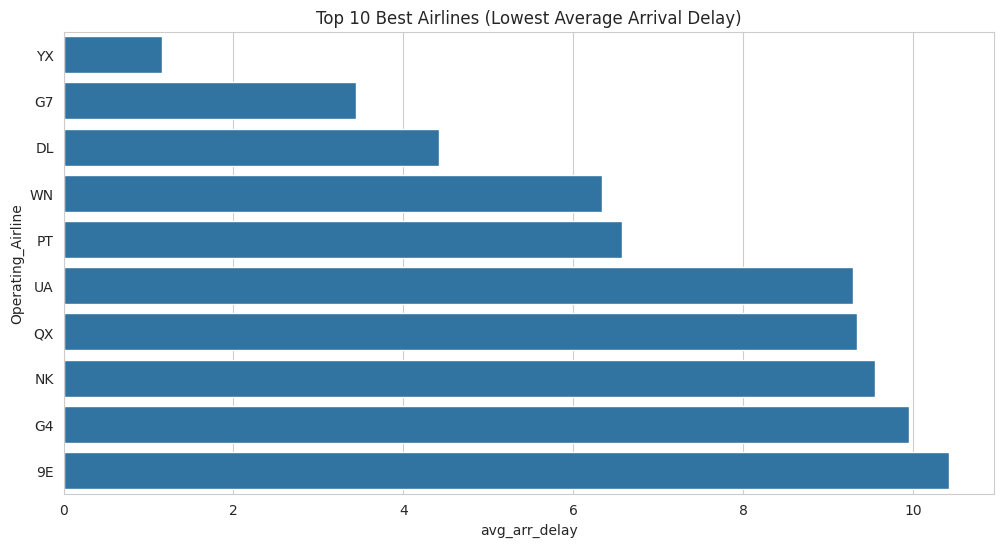

In [ ]:
sns.barplot(
    data=airline_performance.reset_index().head(10),
    x="avg_arr_delay",
    y="Operating_Airline"
)
plt.title("Top 10 Best Airlines (Lowest Average Arrival Delay)")
plt.show()

### Business Insight: Top Performing Airlines by On-Time Performance

Airlines such as **YX and G7** consistently achieve the lowest average arrival delays,
indicating highly efficient operational processes, better turnaround management,
and stronger schedule reliability.

These airlines can be considered **operational benchmarks**, as their performance
demonstrates that maintaining very low delay levels is achievable within the same network environment.

Meanwhile, airlines positioned lower in the top 10 (e.g., G4 and 9E) still perform relatively well
but show noticeably higher delay averages, suggesting:

- greater exposure to congested routes or airports
- tighter scheduling buffers
- higher operational complexity

From a strategic perspective:

- Best-performing airlines represent **best practice models for delay reduction**
- Their operational patterns can be studied to improve network-wide performance

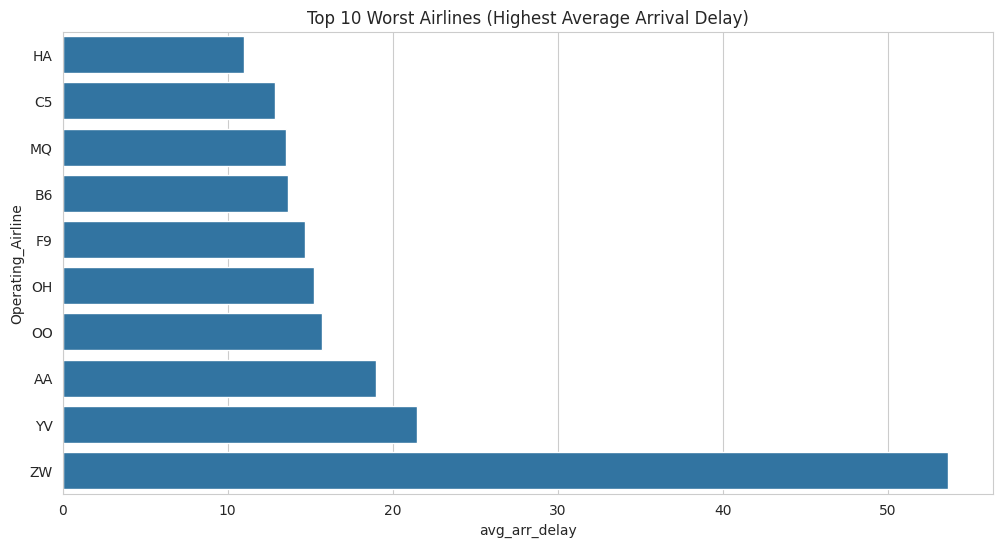

In [ ]:
sns.barplot(
    data=airline_performance.reset_index().tail(10),
    x="avg_arr_delay",
    y="Operating_Airline"
)
plt.title("Top 10 Worst Airlines (Highest Average Arrival Delay)")
plt.show()

### Business Insight: Airlines with the Highest Average Arrival Delay

Airlines such as **ZW and YV** show significantly higher average arrival delays compared
to the rest of the network, indicating structural operational inefficiencies rather than
occasional disruptions.

The delay gap between these carriers and the best-performing airlines is substantial,
suggesting differences in:

- route complexity
- hub congestion exposure
- aircraft utilization strategy
- schedule buffer management

From a business perspective, these airlines represent:

⚠ High operational risk  
⚠ Higher compensation and recovery cost  
⚠ Lower customer satisfaction  
⚠ Potential revenue leakage due to reduced reliability  

These carriers should be prioritized for:

- root cause delay analysis
- schedule redesign
- hub-specific operational improvements

## Delay Pattern by Day of Week

This analysis identifies which day has the highest and lowest delay rate.

Business value:
- Helps airlines optimize scheduling and staffing
- Detects operational congestion patterns
- Supports airport slot and turnaround planning

In [ ]:
delay_by_day = (
    df.groupby("DayOfWeek")
    .agg(
        delay_rate=("is_delayed", "mean"),
        total_flights=("is_delayed", "count")
    )
    .reset_index()
)

delay_by_day["delay_rate"] = delay_by_day["delay_rate"] * 100

delay_by_day

,DayOfWeek,delay_rate,total_flights
0,1,24.113356,71280
1,2,27.784781,67429
2,3,18.662246,69370
3,4,18.524028,59161
4,5,26.440427,58021
5,6,24.247322,53210
6,7,24.458863,59181


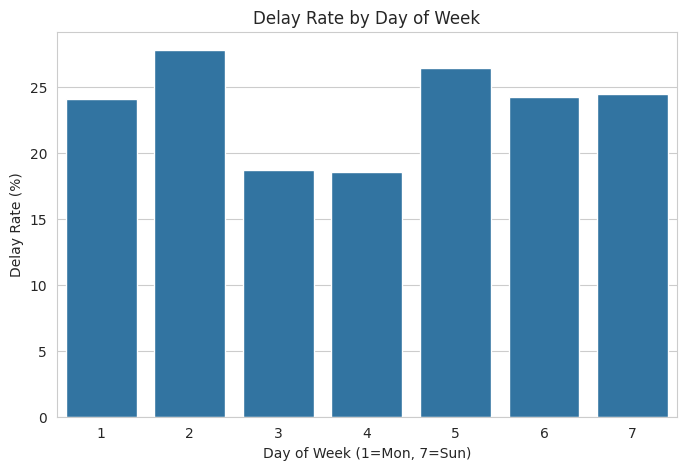

In [ ]:
plt.figure(figsize=(8,5))

sns.barplot(
    data=delay_by_day,
    x="DayOfWeek",
    y="delay_rate"
)

plt.title("Delay Rate by Day of Week")
plt.ylabel("Delay Rate (%)")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")

plt.show()

### Business Insight: Flight Delay by Day of Week

Day 2 and Day 5 record the highest delay rates (27.78% and 26.44%), indicating peak operational pressure on these days.

In contrast, Day 3 and Day 4 show the lowest delay rates (≈18.6%), even with relatively high flight volumes, making them a benchmark for efficient operations.

This pattern suggests that delays are not driven solely by the number of flights, but more by scheduling efficiency, aircraft rotation, and airport congestion.

###  Actionable Insight
High-delay days should be prioritized for schedule optimization and additional buffer time to improve overall on-time performance.

## Weekend vs Weekday Delay Performance

This analysis compares delay performance between weekdays and weekends to identify demand-driven operational pressure.

Business value:
- Helps optimize staffing allocation by day type  
- Identifies congestion differences between business and leisure travel periods  
- Supports better flight scheduling and turnaround planning  

In [ ]:
df["is_weekend"] = df["DayOfWeek"].isin([6, 7])

weekend_delay = (
    df.assign(is_delayed = df["ArrDelay"] > 15)
      .groupby("is_weekend")
      .agg(
          delay_rate = ("is_delayed", "mean"),
          total_flights = ("is_delayed", "count")
      )
      .reset_index()
)

weekend_delay["delay_rate"] *= 100

weekend_delay["day_type"] = weekend_delay["is_weekend"].map({
    True: "Weekend",
    False: "Weekday"
})

weekend_delay[["day_type", "delay_rate", "total_flights"]]

,day_type,delay_rate,total_flights
0,Weekday,23.110364,325261
1,Weekend,24.358712,112391


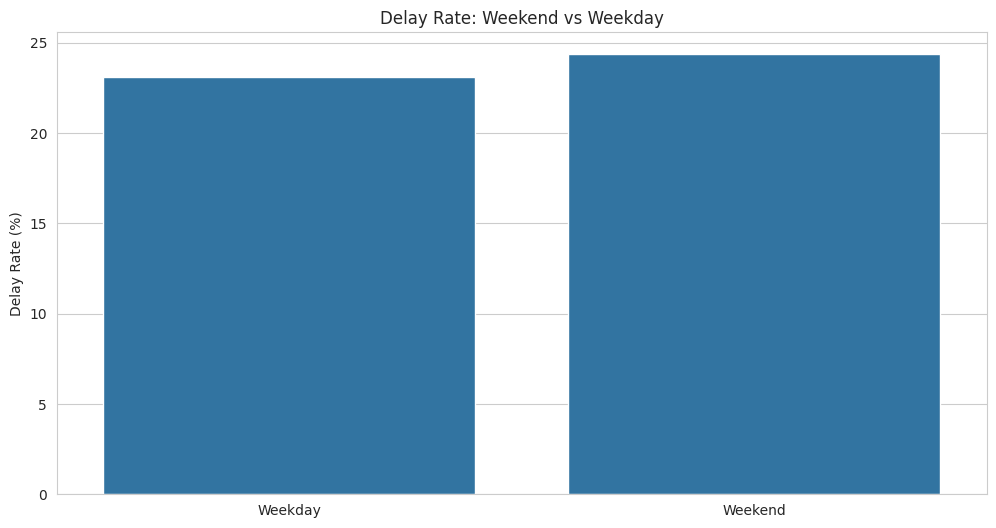

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=weekend_delay, x="day_type", y="delay_rate")
plt.title("Delay Rate: Weekend vs Weekday")
plt.ylabel("Delay Rate (%)")
plt.xlabel("")
plt.show()

###  Business Insight: Weekend vs Weekday Performance

Weekend shows a higher delay rate (24.36%) compared to weekdays (23.11%), even though the total number of flights is significantly lower.

This indicates that delays on weekends are more likely driven by operational constraints such as reduced staffing, tighter aircraft rotation, and different airport congestion patterns rather than flight volume.

###  Actionable Insight
Improving weekend resource allocation and turnaround buffer can help reduce delays and increase overall schedule reliability.

## Route Performance Analysis

This analysis evaluates delay performance across different routes to identify the most problematic, busiest, and most reliable origin–destination pairs.

Business value:
- Supports network planning and route optimization  
- Identifies hub congestion impact  
- Acts as a proxy for route profitability and service quality  

In [ ]:
route_perf = (
    df.assign(is_delayed = df["ArrDelay"] > 15)
      .groupby(["Origin", "Dest"])
      .agg(
          delay_rate = ("is_delayed", "mean"),
          total_flights = ("is_delayed", "count"),
          avg_arr_delay = ("ArrDelay", "mean")
      )
      .reset_index()
)

route_perf["delay_rate"] *= 100
route_perf = route_perf.sort_values("total_flights", ascending=False)

route_perf.head()

,Origin,Dest,delay_rate,total_flights,avg_arr_delay
1287,DCA,BOS,22.240803,598,8.247492
2999,LAX,JFK,20.176991,565,7.904425
2767,JFK,LAX,12.592593,540,-13.059259
3039,LAX,SFO,29.714286,525,9.777143
5235,SFO,LAX,19.186047,516,2.125969


In [ ]:
most_delayed_routes = (
    route_perf.query("total_flights > 200")
              .sort_values("delay_rate", ascending=False)
              .head(10)
)

most_delayed_routes

,Origin,Dest,delay_rate,total_flights,avg_arr_delay
3535,MIA,IAH,41.666667,228,23.171053
4012,ORD,DTW,40.372671,322,25.878882
4063,ORD,MSN,40.298507,201,33.313433
4454,PHX,SFO,39.649123,285,19.547368
3521,MIA,DFW,39.629630,270,23.740741
1823,DTW,RSW,39.512195,205,18.131707
3296,MCO,DFW,38.993711,318,33.075472
4009,ORD,DFW,38.181818,330,22.830303
649,BOS,MCO,37.931034,377,25.946950
1771,DTW,DFW,37.788018,217,19.184332


In [ ]:
most_reliable_routes = (
    route_perf.query("total_flights > 200")
              .sort_values("delay_rate", ascending=True)
              .head(10)
)

most_reliable_routes

,Origin,Dest,delay_rate,total_flights,avg_arr_delay
3043,LAX,SMF,8.494208,259,-3.926641
3042,LAX,SLC,9.113300,406,-4.071429
5458,SMF,LAX,9.638554,249,-4.959839
3041,LAX,SJC,10.045662,219,-2.036530
2313,HNL,LAX,10.526316,247,-9.145749
2709,JAX,ATL,10.661765,272,-3.724265
5312,SJC,LAX,10.740741,270,-7.281481
3749,MSP,PHX,11.290323,248,-4.141129
635,BOS,EWR,11.330049,203,-7.950739
4464,PHX,TUS,11.818182,220,2.363636


###  Business Insight: Route Performance

The highest delay rates are concentrated on routes touching major hubs such as ORD, DFW, DTW, and MIA, with several corridors exceeding 38–41% delay. Given these routes also operate at meaningful volume, they represent disproportionate sources of network disruption where delay propagation, missed connections, and recovery cost are likely compounding.

This pattern indicates structural constraints rather than isolated operational issues — most likely hub congestion, tight aircraft rotation, and insufficient schedule buffer on bank structures.

In contrast, the most reliable high-volume routes are dominated by LAX-connected short- and medium-haul corridors, all maintaining delay rates below ~11% and consistently achieving early arrivals. This reflects strong schedule design, effective turnaround control, and balanced demand–capacity alignment.

From a network perspective, these routes form the operational benchmark and demonstrate that high utilization and high reliability are not mutually exclusive when buffers and flow management are properly calibrated.

###  Strategic Implications

Improvement efforts should be concentrated on high-delay hub-to-hub and hub-to-spoke routes, as performance gains here will deliver the largest reduction in system-wide delay propagation and recovery cost.

At the same time, best practices from the most reliable LAX-based operations — particularly in aircraft rotation timing, ground time discipline, and bank de-peaking — should be replicated across congested hubs to structurally improve on-time performance.

This is not a uniform network problem; it is a targeted network optimization opportunity.

## Distance vs Delay Behavior

This analysis evaluates how delay performance varies between short-haul and long-haul flights to understand aircraft utilization efficiency and scheduling strategy.

Business value:
- Optimizes aircraft rotation and fleet utilization  
- Improves turnaround time planning  
- Supports schedule buffer allocation by flight distance  

In [ ]:
def categorize_distance(d):
    if d < 500:
        return "Short Haul"
    elif d < 1500:
        return "Medium Haul"
    else:
        return "Long Haul"

df["haul_type"] = df["Distance"].apply(categorize_distance)

In [ ]:
distance_delay = (
    df.assign(is_delayed = df["ArrDelay"] > 15)
      .groupby("haul_type")
      .agg(
          delay_rate = ("is_delayed", "mean"),
          avg_arr_delay = ("ArrDelay", "mean"),
          total_flights = ("is_delayed", "count")
      )
      .reset_index()
)

distance_delay["delay_rate"] *= 100
distance_delay

,haul_type,delay_rate,avg_arr_delay,total_flights
0,Long Haul,22.848455,6.493777,56564
1,Medium Haul,24.204074,11.485211,231994
2,Short Haul,22.448925,11.759045,149094


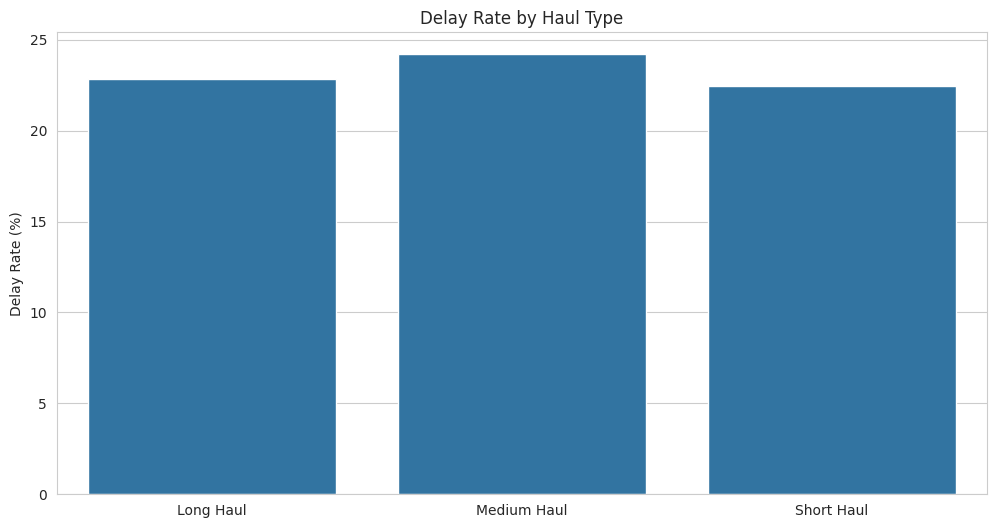

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=distance_delay, x="haul_type", y="delay_rate")
plt.title("Delay Rate by Haul Type")
plt.ylabel("Delay Rate (%)")
plt.xlabel("")
plt.show()

### Business Insight: Distance vs Delay Behavior

Medium-haul flights show the highest delay rate (24.20%) and significantly higher average arrival delay (~11.5 minutes) compared to both short-haul and long-haul operations. This indicates that medium-haul segments are currently the most operationally constrained part of the network.

Short-haul flights operate at the highest volume but maintain a lower delay rate than medium-haul, suggesting that high frequency alone is not the primary driver of delays. However, their high average arrival delay implies tight turnaround cycles and limited recovery buffer, making them highly sensitive to upstream disruption and delay propagation.

Long-haul flights deliver the most stable performance, with the lowest delay rate and the smallest average arrival delay despite their operational complexity. This reflects stronger schedule protection through longer ground time, wider buffer allocation, and lower daily aircraft rotation pressure.

From a fleet and scheduling perspective, the current pattern suggests that buffer time and rotation planning are more effectively optimized for long-haul operations, while medium-haul flights are operating in a structurally compressed schedule environment.

###  Strategic Implications

Medium-haul routes should be the primary target for schedule recalibration, including additional turnaround buffer and rotation redesign, as improvements in this segment will reduce network-wide delay propagation.

At the same time, introducing selective buffer strategies in high-frequency short-haul operations will improve recovery capability without materially reducing aircraft utilization.

The long-haul operating model can be used as a structural benchmark for schedule resilience across the network.

## Delay Cause Analysis

This analysis identifies the primary drivers of flight delays by decomposing total delay into operational and external factors.

Business value:
- Distinguishes controllable vs uncontrollable delays  
- Prioritizes operational improvement initiatives  
- Reduces compensation, recovery cost, and schedule disruption  

In [ ]:
delay_causes = [
    "CarrierDelay",
    "WeatherDelay",
    "NASDelay",
    "SecurityDelay",
    "LateAircraftDelay"
]

cause_summary = (
    df[delay_causes]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

cause_summary.columns = ["delay_cause", "total_delay_minutes"]
cause_summary

,delay_cause,total_delay_minutes
0,LateAircraftDelay,3213205.0
1,CarrierDelay,2731065.0
2,NASDelay,1481629.0
3,WeatherDelay,926115.0
4,SecurityDelay,16365.0


In [ ]:
cause_summary["percentage"] = (
    cause_summary["total_delay_minutes"]
    / cause_summary["total_delay_minutes"].sum()
) * 100

cause_summary

,delay_cause,total_delay_minutes,percentage
0,LateAircraftDelay,3213205.0,38.396982
1,CarrierDelay,2731065.0,32.635532
2,NASDelay,1481629.0,17.705090
3,WeatherDelay,926115.0,11.066839
4,SecurityDelay,16365.0,0.195558


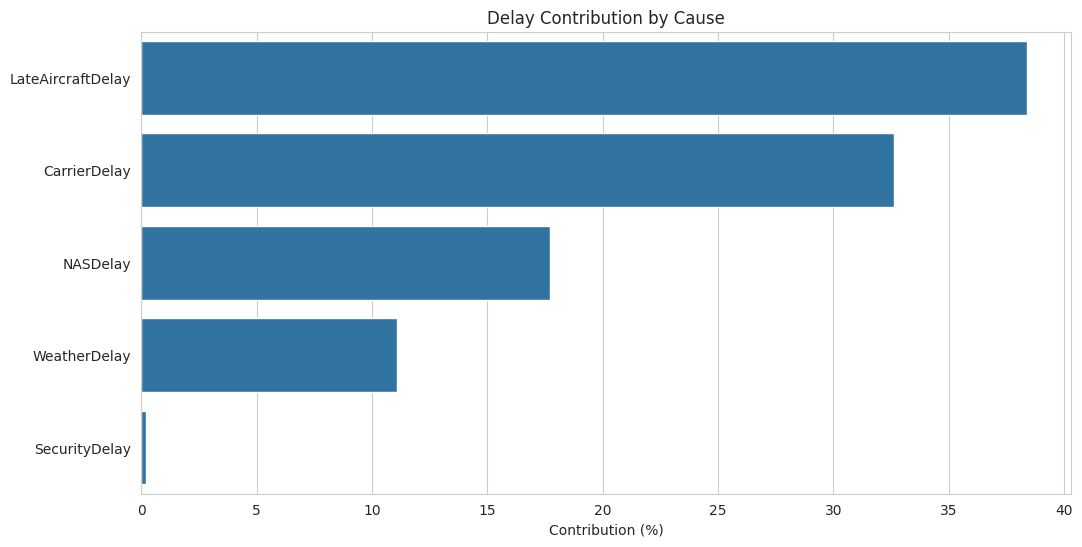

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=cause_summary, x="percentage", y="delay_cause")
plt.title("Delay Contribution by Cause")
plt.xlabel("Contribution (%)")
plt.ylabel("")
plt.show()

### Business Insight: Delay Cause Analysis

The delay structure is overwhelmingly driven by operational factors within the airline’s control. Late aircraft delay alone contributes 38.4% of total delay minutes, followed by carrier-related delays at 32.6%. Combined, these two categories account for more than 70% of all delays, indicating that the primary issue is schedule integrity and aircraft rotation efficiency rather than external disruption.

This pattern confirms a delay propagation network, where late inbound aircraft systematically pushes delays downstream across multiple flights. In this environment, recovery becomes structurally difficult, increasing crew misalignment, passenger misconnections, and compensation cost.

NAS delays (17.7%) represent system congestion at the airport and airspace level. While partially external, their impact can be mitigated through better bank structure design, schedule de-peaking, and strategic buffer allocation.

Weather contributes only 11.1% of total delay minutes, meaning it is not the dominant driver of performance and should not be treated as the primary operational narrative.

Security-related delays are operationally negligible.

###  Strategic Implications

The highest ROI improvement will come from breaking the delay propagation cycle through:
- stronger aircraft rotation buffers
- protected first-wave departures
- tighter ground time discipline
- selective schedule de-peaking at congested hubs

This is fundamentally a schedule design and operations control issue, not a disruption management issue.

Reducing late aircraft delay will generate a network-wide multiplier effect, simultaneously improving on-time performance, lowering recovery cost, increasing crew and asset productivity, and improving customer reliability perception.

## Top Airport Pairs with the Highest Delay

This analysis identifies high-delay airport pairs with significant traffic volume to detect structural congestion corridors in the network.

Business value:
- Highlights the biggest sources of delay propagation  
- Supports hub decongestion strategy  
- Prioritizes high-impact operational improvements  

In [ ]:
high_volume_routes = route_perf.query("total_flights > 300")

In [ ]:
top_delay_airport_pairs = (
    high_volume_routes
    .sort_values("delay_rate", ascending=False)
    .head(10)
)

top_delay_airport_pairs

,Origin,Dest,delay_rate,total_flights,avg_arr_delay
4012,ORD,DTW,40.372671,322,25.878882
3296,MCO,DFW,38.993711,318,33.075472
4009,ORD,DFW,38.181818,330,22.830303
649,BOS,MCO,37.931034,377,25.946950
2524,IAH,DFW,35.151515,330,32.427273
1810,DTW,ORD,34.461538,325,26.855385
1798,DTW,MCO,33.436533,323,26.427245
4054,ORD,MCO,33.333333,390,18.317949
1629,DFW,LAS,32.899023,307,22.527687
4048,ORD,LGA,31.764706,510,20.313725


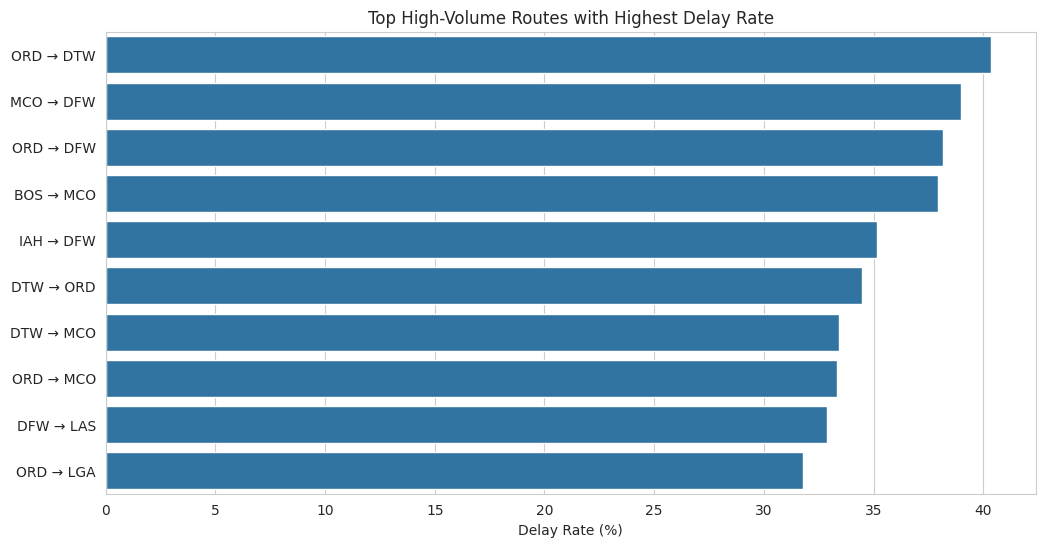

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=top_delay_airport_pairs,
    y=top_delay_airport_pairs["Origin"] + " → " + top_delay_airport_pairs["Dest"],
    x="delay_rate"
)

plt.title("Top High-Volume Routes with Highest Delay Rate")
plt.xlabel("Delay Rate (%)")
plt.ylabel("")
plt.show()

###  Business Insight: High-Delay Airport Corridors

The highest delay rates are concentrated on hub-to-hub and hub-to-major-spoke corridors, with ORD, DFW, and DTW appearing repeatedly across the list. This confirms that delay is not route-specific but structurally linked to congestion in key connecting hubs.

ORD is the most critical bottleneck in the network, contributing to multiple high-delay flows (ORD ↔ DTW, ORD → DFW, ORD → MCO, ORD → LGA). Given the high traffic volume on these routes, performance degradation in ORD is likely propagating across a large portion of the network.

Similarly, DFW appears both as a source and receiver of delays (MCO → DFW, IAH → DFW, DFW → LAS), indicating pressure on bank structures and aircraft rotation timing.

These are not isolated operational issues — they represent delay corridors where disruption is systematically transmitted between hubs.

From a passenger and revenue perspective, these corridors carry high connectivity flows, meaning delays here disproportionately increase missed connections, reaccommodation cost, and customer dissatisfaction.

###  Strategic Implications

Improving performance at ORD and DFW will deliver the largest system-wide on-time performance gain due to their central role in delay propagation.

Priority actions should focus on:
- bank de-peaking at congested hubs  
- protecting first-wave departures  
- increasing rotation buffer on hub-to-hub aircraft cycles  
- flow-based scheduling instead of volume-based scheduling  

This is a network flow problem, not a station-level performance issue.

## Most Reliable High-Volume Routes

This analysis identifies high-traffic routes with consistently low delay rates to detect structurally strong corridors in the network.

Business value:
- Reveals scalable and high-quality revenue corridors  
- Provides operational best-practice benchmarks  
- Supports strategic network expansion and schedule replication  

In [ ]:
most_reliable_high_volume = (
    route_perf.query("total_flights > 300")
    .sort_values("delay_rate", ascending=True)
    .head(10)
)

most_reliable_high_volume

,Origin,Dest,delay_rate,total_flights,avg_arr_delay
3042,LAX,SLC,9.113300,406,-4.071429
2767,JFK,LAX,12.592593,540,-13.059259
4413,PHX,LAX,13.256484,347,2.348703
5091,SEA,LAX,13.623188,345,-1.739130
3038,LAX,SEA,13.827160,405,-0.809877
4457,PHX,SLC,14.603960,404,4.641089
5397,SLC,LAX,14.874142,437,-2.716247
3699,MSP,DEN,15.133531,337,-3.338279
2988,LAX,EWR,15.133531,337,1.893175
2950,LAS,SLC,15.231788,302,-0.619205


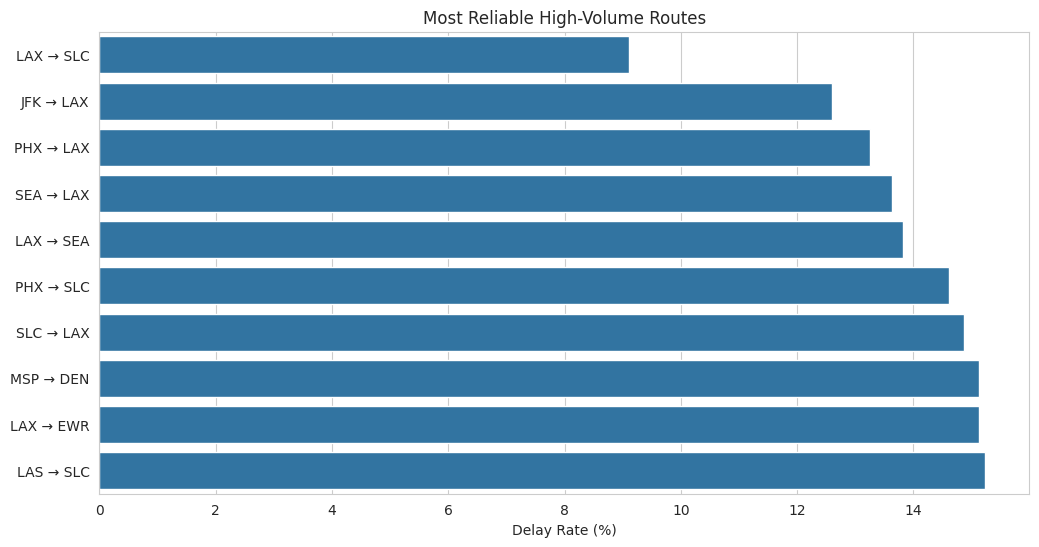

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=most_reliable_high_volume,
    y=most_reliable_high_volume["Origin"] + " → " + most_reliable_high_volume["Dest"],
    x="delay_rate"
)

plt.title("Most Reliable High-Volume Routes")
plt.xlabel("Delay Rate (%)")
plt.ylabel("")
plt.show()

### Business Insight: Most Reliable High-Volume Routes

The most reliable high-traffic corridors are heavily concentrated around LAX, with multiple flows (LAX ↔ SLC, LAX ↔ SEA, JFK → LAX, PHX → LAX) maintaining delay rates between ~9–14% while handling substantial flight volume.

This indicates that LAX is operating as a structurally stable hub with strong schedule integrity, efficient turnaround execution, and well-balanced demand–capacity alignment. The consistent negative or near-zero average arrival delays on several of these routes show that the schedule is not only reliable but also contains embedded recovery capability.

Transcontinental service (JFK → LAX) stands out as both high-volume and highly reliable, which is operationally significant given its complexity. This reflects effective long-haul rotation planning, protected aircraft utilization, and priority handling within the network.

In addition, short- and medium-haul western corridors (LAX–SLC, PHX–SLC, LAS–SLC, MSP–DEN) demonstrate that high frequency can coexist with high punctuality when congestion exposure is low and bank structures are properly spaced.

###  Strategic Implications

These routes represent the airline’s core scalable network — high-quality revenue flows where additional frequency can be added with minimal risk of delay propagation.

Operational practices from the LAX system — particularly in aircraft rotation timing, ground time discipline, and wave structure — should be used as the benchmark for restructuring performance at congested hubs such as ORD and DFW.

From a network strategy perspective, this is where growth should be concentrated, while operational recovery efforts should focus on structurally constrained corridors.

This confirms that the network already contains a proven operating model for high utilization with high reliability — the challenge is replication, not reinvention.